In [19]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set()

In [20]:
df  = pd.read_csv("C://Users//user//OneDrive//Desktop//german_credit_data.csv")

In [21]:
df.head(5)

,Unnamed: 0,Age,Sex,Job,Housing,Savingaccounts,Checkingaccount,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [22]:
## DATA PRE-PROCESSING

#Finding out missing values in each column
print(df.isna().sum())
missing_status=df.isna().sum()
##print(df.isnull().sum())

Unnamed: 0           0
Age                  0
Sex                  0
Job                  0
Housing              0
Savingaccounts     183
Checkingaccount    394
Credit amount        0
Duration             0
Purpose              0
Risk                 0
dtype: int64


In [25]:
df.dropna(subset = ["Savingaccounts","Checkingaccount"], inplace=True)

In [26]:
df.head(5)

,Unnamed: 0,Age,Sex,Job,Housing,Savingaccounts,Checkingaccount,Credit amount,Duration,Purpose,Risk
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad
7,7,35,male,3,rent,little,moderate,6948,36,car,good
9,9,28,male,3,own,little,moderate,5234,30,car,bad


In [27]:
## DATA PRE-PROCESSING

#Finding out missing values in each column
print(df.isna().sum())
missing_status=df.isna().sum()
##print(df.isnull().sum())

Unnamed: 0         0
Age                0
Sex                0
Job                0
Housing            0
Savingaccounts     0
Checkingaccount    0
Credit amount      0
Duration           0
Purpose            0
Risk               0
dtype: int64


In [28]:
df.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Savingaccounts',
       'Checkingaccount', 'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.Housing = le.fit_transform(df.Housing)
df.Savingaccounts = le.fit_transform(df.Savingaccounts)
df.Risk = le.fit_transform(df.Risk)
df.head(5)

,Unnamed: 0,Age,Sex,Job,Housing,Savingaccounts,Checkingaccount,Credit amount,Duration,Purpose,Risk
1,1,22,female,2,1,0,moderate,5951,48,radio/TV,0
3,3,45,male,2,0,0,little,7882,42,furniture/equipment,1
4,4,53,male,2,0,0,little,4870,24,car,0
7,7,35,male,3,2,0,moderate,6948,36,car,1
9,9,28,male,3,1,0,moderate,5234,30,car,0


In [30]:
X=df[['Job','Housing','Savingaccounts']]
Y=df[['Risk']]

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)

In [32]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, Y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(metric='euclidean')

In [33]:
Y_pred = knn.predict(X_test)

In [34]:
confusion_matrix(Y_test, Y_pred)

array([[15, 38],
       [23, 55]], dtype=int64)

In [36]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)

0.5343511450381679

C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

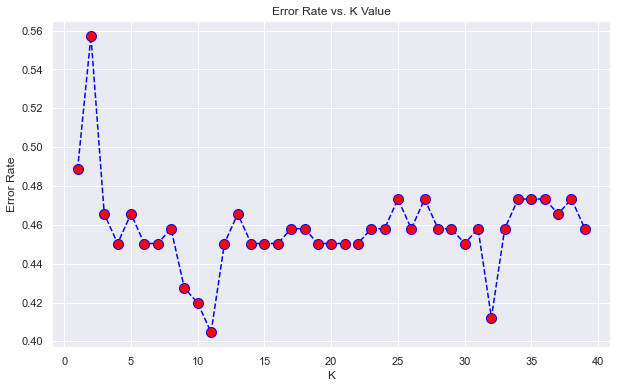

Minimum error:- 0.40458015267175573 at K = 11


In [37]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,Y_train)
 pred_i = knn.predict(X_test)
 #print (pred_i)
 #print (1-accuracy_score(y_test, pred_i))
 error_rate.append(1-accuracy_score(Y_test, pred_i))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

In [38]:
knn = KNeighborsClassifier(n_neighbors=11, metric='euclidean')
knn.fit(X_train, Y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [39]:
Y_pred = knn.predict(X_test)

In [40]:
accuracy_score(Y_test, Y_pred)

0.5954198473282443

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier as dtree
from sklearn.tree import export_graphviz
import graphviz

In [43]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [44]:
X=df[['Job','Housing','Savingaccounts']]
Y=df[['Risk']]

In [45]:
ss = StandardScaler()
ss.fit(X)
X = ss.transform(X)

StandardScaler()

In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(
                                                     X,
                                                     Y,
                                                     test_size = 0.3,
                                                     shuffle = True,
                                                     stratify = Y
                                                    )

In [48]:
X_train.shape 
print()

X_test.shape  
print()

(365, 3)

(157, 3)

In [49]:
ct = dtree(
           criterion="gini",    
           max_depth=None      
           )

In [50]:
ct.fit(X_train,Y_train)

DecisionTreeClassifier()

In [51]:
Y_te = ct.predict(X_test)

In [57]:
Y_te = Y_te.reshape(157,1)

In [58]:
np.sum((Y_test == Y_te))/Y_test.size

Risk    0.56051
dtype: float64

<Figure size 864x504 with 0 Axes>

[Text(410.13, 356.73749999999995, 'X[2] <= 1.522\ngini = 0.494\nsamples = 365\nvalue = [162, 203]'),
 Text(284.58, 309.1725, 'X[1] <= 0.733\ngini = 0.497\nsamples = 336\nvalue = [155, 181]'),
 Text(167.4, 261.60749999999996, 'X[1] <= -1.022\ngini = 0.492\nsamples = 270\nvalue = [118, 152]'),
 Text(76.52571428571429, 214.0425, 'X[0] <= 0.916\ngini = 0.497\nsamples = 41\nvalue = [22, 19]'),
 Text(38.26285714285714, 166.4775, 'X[0] <= -2.016\ngini = 0.454\nsamples = 23\nvalue = [15, 8]'),
 Text(19.13142857142857, 118.91250000000002, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(57.394285714285715, 118.91250000000002, 'X[0] <= -0.55\ngini = 0.434\nsamples = 22\nvalue = [15, 7]'),
 Text(38.26285714285714, 71.34749999999997, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(76.52571428571429, 71.34749999999997, 'X[2] <= 0.207\ngini = 0.475\nsamples = 18\nvalue = [11, 7]'),
 Text(57.394285714285715, 23.782500000000027, 'gini = 0.408\nsamples = 14\nvalue = [10, 4]'),
 Text(95.6571428571428

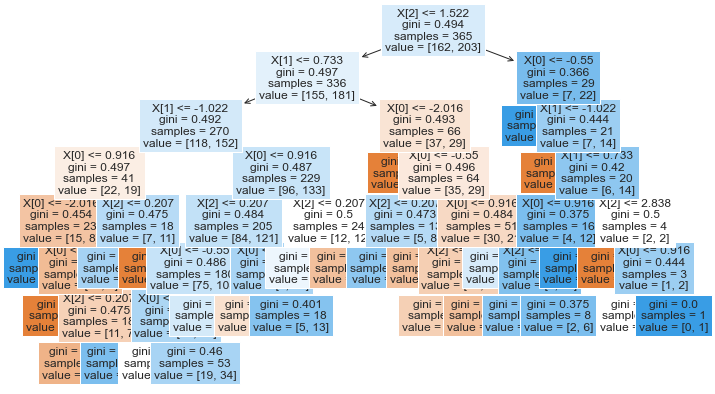

In [60]:
from sklearn import tree
plt.figure(figsize=(12,7))
tree.plot_tree(ct, filled=True, fontsize=12)

In [73]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [74]:
model = RandomForestRegressor(random_state=1)
model.fit(X_train, Y_train)

C:\Users\user\AppData\Local\Temp/ipykernel_11576/1616795480.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, Y_train)


RandomForestRegressor(random_state=1)

In [76]:
Yhat = model.predict(X_test)
print (Yhat)
# evaluate predictions
mae = mean_absolute_error(Y_test, Yhat)
print('MAE: %.3f' % mae)

[0.55665934 0.34812185 0.28218417 0.72459768 0.28218417 0.64811254
 0.55665934 0.55665934 0.72769263 0.28218417 0.70142868 0.65513892
 0.55665934 0.38234212 0.33817965 0.72459768 0.55665934 0.4508305
 0.38234212 0.75555177 0.54753837 0.55665934 0.75555177 0.72769263
 0.55665934 0.70142868 0.55665934 0.55665934 0.70142868 0.38234212
 0.65513892 0.54753837 0.38234212 0.38234212 0.65513892 0.55665934
 0.55665934 0.34812185 0.53024242 0.03446106 0.93904329 0.53024242
 0.40686006 0.55665934 0.55665934 0.64811254 0.54753837 0.38234212
 0.55665934 0.64811254 0.72769263 0.65513892 0.65513892 0.54753837
 0.38234212 0.55665934 0.70142868 0.64811254 0.54753837 0.54753837
 0.72769263 0.72769263 0.28218417 0.64426471 0.54753837 0.65513892
 0.65513892 0.65513892 0.72769263 0.54753837 0.28218417 0.38234212
 0.2270722  0.55665934 0.55665934 0.65513892 0.65513892 0.38234212
 0.55665934 0.38234212 0.72459768 0.55665934 0.33817965 0.70142868
 0.72769263 0.65513892 0.55665934 0.74247619 0.54753837 0.38234

In [77]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,Y_train)

y_pred=clf.predict(X_test)

C:\Users\user\AppData\Local\Temp/ipykernel_11576/117644506.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train,Y_train)


RandomForestClassifier()

In [80]:
from sklearn.metrics import accuracy_score

In [95]:
len(Y_test)

157

In [96]:
len(Y_pred)

131

In [99]:
Y_tes = Y_test[0:131]

In [100]:
accuracy_score(Y_tes, Y_pred)

0.5343511450381679

In [101]:
metrics.confusion_matrix(Y_tes, Y_pred)

array([[12, 47],
       [14, 58]], dtype=int64)

In [102]:
df.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Savingaccounts',
       'Checkingaccount', 'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [103]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index =['Job','Housing','Savingaccounts']).sort_values(ascending=False)
feature_imp

Job               0.385093
Savingaccounts    0.316237
Housing           0.298671
dtype: float64

<AxesSubplot:>

Text(0.5, 0, 'Feature Importance Score')

Text(0, 0.5, 'Features')

Text(0.5, 1.0, 'Visualizing Important Features')

No handles with labels found to put in legend.


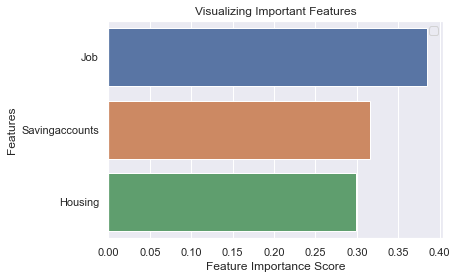

In [104]:
#visualizing feature importance results
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [ ]:
#did not drop any test columns
#KNN classifier gives the highest accuracy of 59%